支持向量机可以支持线性和非线性的分类任务，回归甚至异常值检测任务。

# 5.1_线性SVM分类

SVM可以通过下面这个例子进行理解：

In [2]:
#from sklearn.svm import SVC
#from sklearn import datasets
#
#iris = datasets.load_iris()
#X = iris["data"][:,(2,3)]
#y = iris["target"]
#
#setosa_or_versicolor = (y == 0) | (y == 1)
#X = X[setosa_or_versicolor]
#y = y[setosa_or_versicolor]
#
## 训练SVM分类器
#svm_clf = SVC(kernel='linear',C=float("inf"))
#svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

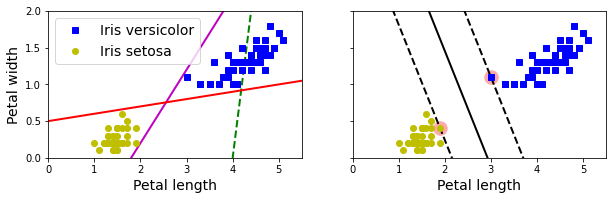

In [7]:
## 较差的模型
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
#
#x0 = np.linspace(0,5.5,200)
#pred_1 = 5*x0 - 20
#pred_2 = x0 - 1.8
#pred_3 = 0.1 * x0 + 0.5
#
#def plot_svc_decision_boundary(svm_clf,xmin,xmax):
#    w = svm_clf.coef_[0]
#    b = svm_clf.intercept_[0]
#    
#    #所有决策分界线：w0*wo + w1*w1 + b = 0  ==>  x1 = -w0/w1 * x0 - b/w1
#    x0 = np.linspace(xmin,xmax,200)
#    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
#    
#    margin = 1/w[1]
#    gutter_up = decision_boundary + margin
#    gutter_down = decision_boundary - margin
#    
#    svs = svm_clf.support_vectors_
#    plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
#    plt.plot(x0,decision_boundary,"k-",linewidth=2)
#    plt.plot(x0,gutter_up,"k--",linewidth=2)
#    plt.plot(x0,gutter_down,"k--",linewidth=2)
#    
#fig,axes = plt.subplots(ncols=2,figsize=(10,2.7),sharey=True)
#
#plt.sca(axes[0])
#plt.plot(x0,pred_1,"g--",linewidth=2)
#plt.plot(x0,pred_2,"m-",linewidth=2)
#plt.plot(x0,pred_3,"r-",linewidth=2)
#plt.plot(X[:,0][y==1],X[:,1][y==1],"bs",label="Iris versicolor")
#plt.plot(X[:,0][y==0],X[:,1][y==0],"yo",label="Iris setosa")
#plt.xlabel("Petal length",fontsize=14)
#plt.ylabel("Petal width",fontsize=14)
#plt.legend(loc="upper left",fontsize=14)
#plt.axis([0,5.5,0,2])
#
#plt.sca(axes[1])
#plot_svc_decision_boundary(svm_clf,0,5.5)
#plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
#plt.plot(X[:,0][y==0],X[:,1][y==0],'yo')
#plt.xlabel("Petal length",fontsize=14)
#plt.axis([0,5.5,0,2])
#plt.show()

计算出一条线使得两个类可以轻松的被一条直线分开。

在左图中，很显然绿色虚线的表现很差，紫色和红色的直线可以完美的分割，但是比较之下右图中的黑色直线不仅完美分割，而且尽可能的远离两个类别的区域。

右侧的图片就像一个街道，我们的目标就是使得“街道”尽可能的宽，所以我们也叫它大间隔分类。

#### 注意：

    当在街道两侧的地方增加实例时，决策边界不会受他们的影响，也就是说它只受街道边缘的实例的影响。而这些影响这条直线的实例（已在上面右图中被标出）被称为支持向量！

#### 特点：

    SVM对特征缩放特别敏感，如图所示：

(-2.0, 2.0, -2.0, 2.0)

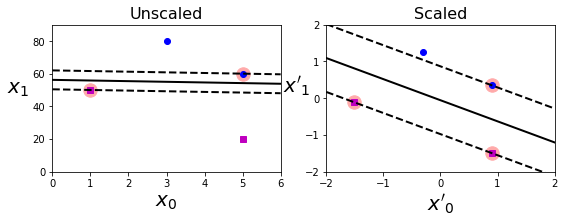

In [11]:
#绘制图像
#Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
#ys = np.array([0, 0, 1, 1])
#svm_clf = SVC(kernel="linear", C=100)
#svm_clf.fit(Xs, ys)
#
#plt.figure(figsize=(9,2.7))
#plt.subplot(121)
#plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
#plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
#plot_svc_decision_boundary(svm_clf, 0, 6)
#plt.xlabel("$x_0$", fontsize=20)
#plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
#plt.title("Unscaled", fontsize=16)
#plt.axis([0, 6, 0, 90])
#
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(Xs)
#svm_clf.fit(X_scaled, ys)
#
#plt.subplot(122)
#plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
#plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
#plot_svc_decision_boundary(svm_clf, -2, 2)
#plt.xlabel("$x'_0$", fontsize=20)
#plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
#plt.title("Scaled", fontsize=16)
#plt.axis([-2, 2, -2, 2])

因为垂直刻度比横向刻度大很多，因此可能最宽的街道接近平行。在特征缩放之后会变好很多（比如使用scikit-learn的StandardScaler之后）

# 软间隔分类

极为严格的把两个类分开，让所有实例点都不在所谓的“街道”上，这样的方法就叫硬间隔分类。

硬间隔分类所出现的问题在于：

    首先，硬间隔分类只有在数据是可线性分离时才有这样的直线

    第二，他对异常值极为敏感。
    
如下图就是两个很好的例子：

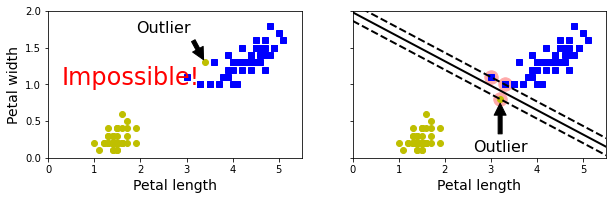

In [15]:
# 绘制图像
#X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
#y_outliers = np.array([0, 0])
#Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
#yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
#Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
#yo2 = np.concatenate([y, y_outliers[1:]], axis=0)
#
#svm_clf2 = SVC(kernel="linear", C=10**9)
#svm_clf2.fit(Xo2, yo2)
#
#fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)
#
#plt.sca(axes[0])
#plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
#plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
#plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
#plt.annotate("Outlier",
#             xy=(X_outliers[0][0], X_outliers[0][1]),
#             xytext=(2.5, 1.7),
#             ha="center",
#             arrowprops=dict(facecolor='black', shrink=0.1),
#             fontsize=16,
#            )
#plt.axis([0, 5.5, 0, 2])
#
#plt.sca(axes[1])
#plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
#plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
#plot_svc_decision_boundary(svm_clf2, 0, 5.5)
#plt.xlabel("Petal length", fontsize=14)
#plt.annotate("Outlier",
#             xy=(X_outliers[1][0], X_outliers[1][1]),
#             xytext=(3.2, 0.08),
#             ha="center",
#             arrowprops=dict(facecolor='black', shrink=0.1),
#             fontsize=16,
#            )
#plt.axis([0, 5.5, 0, 2])
#
#plt.show()

左图因为异常值根本无法得出硬间隔，而右图虽然找到了，但是“街道”宽度很窄和之前计算出的正确间隔大相径庭，这并不是我们想要的答案。

为了避免这些问题，我们应该在保持“街道”开阔与限制间隔违例这两者之间找到平衡，而不是像硬间隔分类一样将重心全部放在后者上。这就是软间隔分类

回到训练模型中，在使用scikit-learn创建SVM模型时，我们可以指定一个超参数——c。

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(4.0, 5.9, 0.8, 2.8)

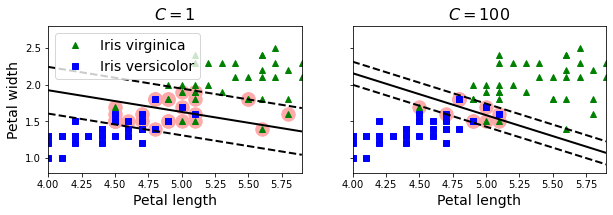

In [19]:
#import numpy as np
#from sklearn import datasets
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.svm import LinearSVC
#
#iris = datasets.load_iris()
#X = iris["data"][:, (2, 3)]  # petal length, petal width
#y = (iris["target"] == 2).astype(np.float64)  # Iris virginica
#
#svm_clf = Pipeline([
#        ("scaler", StandardScaler()),
#        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
#    ])
#
#svm_clf.fit(X, y)
#
#
#scaler = StandardScaler()
#svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
#svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)
#
#scaled_svm_clf1 = Pipeline([
#        ("scaler", scaler),
#        ("linear_svc", svm_clf1),
#    ])
#scaled_svm_clf2 = Pipeline([
#        ("scaler", scaler),
#        ("linear_svc", svm_clf2),
#    ])
#
#scaled_svm_clf1.fit(X, y)
#scaled_svm_clf2.fit(X, y)
#
#
#b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
#b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
#w1 = svm_clf1.coef_[0] / scaler.scale_
#w2 = svm_clf2.coef_[0] / scaler.scale_
#svm_clf1.intercept_ = np.array([b1])
#svm_clf2.intercept_ = np.array([b2])
#svm_clf1.coef_ = np.array([w1])
#svm_clf2.coef_ = np.array([w2])
#
## Find support vectors (LinearSVC does not do this automatically)
#t = y * 2 - 1
#support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
#support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
#svm_clf1.support_vectors_ = X[support_vectors_idx1]
#svm_clf2.support_vectors_ = X[support_vectors_idx2]
#
#
#fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)
#
#plt.sca(axes[0])
#plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
#plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
#plot_svc_decision_boundary(svm_clf1, 4, 5.9)
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
#plt.legend(loc="upper left", fontsize=14)
#plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
#plt.axis([4, 5.9, 0.8, 2.8])
#
#plt.sca(axes[1])
#plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
#plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
#plot_svc_decision_boundary(svm_clf2, 4, 5.99)
#plt.xlabel("Petal length", fontsize=14)
#plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
#plt.axis([4, 5.9, 0.8, 2.8])

如上图所示，c较低时，间隔会比较大（“街道”较宽）；c较高时，间隔冲突会更少。

数据的间隔冲突很糟糕，但是最好的话应该少一些。但是，在这种情况下，虽然左侧有很多间隔违例的情况，可是相比右侧，泛化效果会好一些。